Epoch 0, Loss: 0.14237176049762387
Epoch 100, Loss: 0.0008326716392805708
Epoch 200, Loss: 0.00039876834838298693
Epoch 300, Loss: 0.0002590550665637277
Epoch 400, Loss: 0.00019070470216855717
Epoch 500, Loss: 0.00015035523804438061
Epoch 600, Loss: 0.00012380446942889694
Epoch 700, Loss: 0.00010504629588597701
Epoch 800, Loss: 9.111013460785938e-05
Epoch 900, Loss: 8.036085097212643e-05


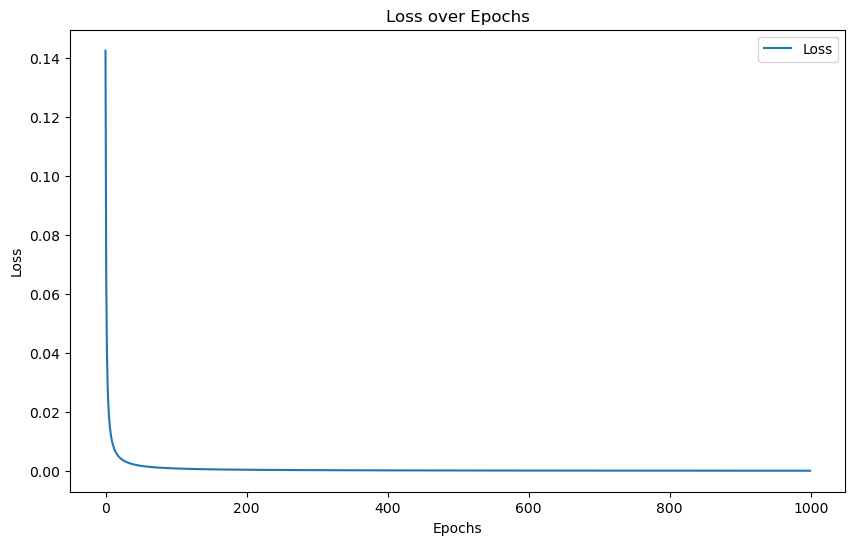

Accuracy on test set: 100.00%


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset and select only two classes for binary classification
data = load_iris()
X = data.data[data.target != 2]  # Selecting only two classes (0 and 1)
y = data.target[data.target != 2]  # Selecting only two classes (0 and 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network parameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1  # Binary classification
learning_rate = 0.1
epochs = 1000

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# List to store loss values for each epoch
loss_values = []

# Training with feedforward and backpropagation
for epoch in range(epochs):
    # Feedforward
    z1 = np.dot(X_train, W1) + b1
    h1 = sigmoid(z1)  # Activation in hidden layer
    z2 = np.dot(h1, W2) + b2
    y_pred = sigmoid(z2)  # Activation in output layer

    # Calculate the loss (Mean Squared Error)
    loss = np.mean((y_pred - y_train.reshape(-1, 1))**2)
    loss_values.append(loss)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

    # Backpropagation
    # Output layer error
    delta2 = (y_pred - y_train.reshape(-1, 1)) * sigmoid_derivative(z2)

    # Hidden layer error
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(z1)

    # Compute gradients
    dW2 = np.dot(h1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    dW1 = np.dot(X_train.T, delta1)
    db1 = np.sum(delta1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()

# Testing accuracy
z1_test = np.dot(X_test, W1) + b1
h1_test = sigmoid(z1_test)
z2_test = np.dot(h1_test, W2) + b2
y_pred_test = sigmoid(z2_test)
y_pred_class = (y_pred_test > 0.5).astype(int).flatten()
accuracy = np.mean(y_pred_class == y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')
